<a href="https://colab.research.google.com/github/DaruHashida/MyPyTorch/blob/main/%22digits_recognition_exercise_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

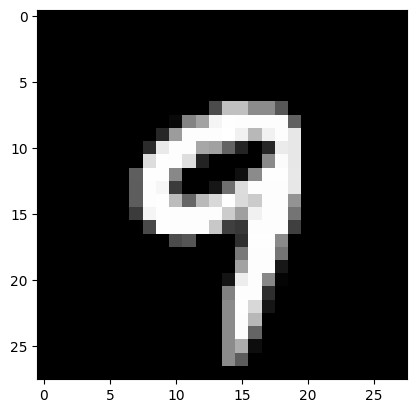

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

# Device agnostic code

device = "cuda" if torch.cuda.is_available() else "cpu"

##LET'S CREATE A DATASET
from pathlib import Path
import requests

DATA_PATH = Path("data")
PATH = DATA_PATH / "mnist"

PATH.mkdir(parents=True, exist_ok = True)

URL = "https://github.com/pytorch/tutorials/raw/main/_static/"
FILENAME = "mnist.pkl.gz"

if not (PATH/FILENAME).exists():
  content = requests.get(URL + FILENAME).content
  (PATH/FILENAME).open("wb").write(content)

import pickle
import gzip
with gzip.open((PATH/FILENAME).as_posix(),"rb") as f:
  ((X_train, y_train),(X_test, y_test), _ )= pickle.load(f, encoding="latin-1")

import matplotlib.pyplot as plt
import numpy as np
plt.imshow(X_train[116].reshape((28,28)),cmap="gray")

In [2]:
X_train, y_train, X_test, y_test = map (torch.tensor, (X_train, y_train, X_test, y_test))

In [3]:
#Let's build the model

class PicturesRecognitionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(784, 10,
                                            requires_grad=True,
                                            dtype=torch.float))
    self.bias = nn.Parameter(torch.zeros(10,
                                            requires_grad=True,
                                            dtype=torch.float))
  def forward(self,xb: torch.Tensor) -> torch.Tensor:
    return xb @ self.weights + self.bias

In [4]:
model = PicturesRecognitionModel()
model.to(device)
model.state_dict()

OrderedDict([('weights',
              tensor([[-0.7563, -0.9907, -0.6685,  ..., -0.3569,  0.4159,  1.6169],
                      [ 1.7867, -1.1032, -0.1034,  ...,  0.0531,  1.7041,  0.8573],
                      [-2.0896, -0.6570,  0.0371,  ...,  1.1049,  0.2394,  0.1565],
                      ...,
                      [ 0.8243, -0.7129,  0.5099,  ..., -1.4638, -1.1888,  0.1993],
                      [ 0.1917, -0.7956,  0.0989,  ..., -0.3795,  0.8491,  0.9494],
                      [ 0.6942, -0.0952,  0.2848,  ...,  1.1350,  1.1750,  0.0754]],
                     device='cuda:0')),
             ('bias',
              tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.], device='cuda:0'))])

In [5]:
#Create loss function
##loss_fn = nn.NLLLoss()
# def nll(input, target):
#     return -input[range(target.shape[0]), target].mean()
#loss_fn = nll
import torch.nn.functional as F
loss_fn = F.cross_entropy
optimizer = torch.optim.SGD(params=model.parameters(),
                            lr=0.5)

In [6]:
#Saving images count to variable
n = X_train.shape[0]
#Saving batch size to variable
batch = 64
X_test.shape

torch.Size([10000, 784])

In [7]:
def accuracy(out, yb):
    preds = torch.argmax(out, dim=1)
    return (preds == yb).float().mean()

In [16]:
epochs = 1000
#Removing data on device
X_train = X_train.to(device)
X_test = X_test.to(device)
y_train = y_train.to(device)
y_test = y_test.to(device)
#Training loop

for epoch in range(epochs):
  for i in range((n - 1)// batch + 1):
    model.train()
    start_i = i*batch
    end_i = start_i+batch
    Xb = X_train[start_i:end_i]
    yb = y_train[start_i:end_i]

    y_pred = model(Xb)
    loss = loss_fn(y_pred, yb)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    #Testing loop

    model.eval()
    with torch.inference_mode():
      start_i_test = start_i//5
      end_i_test = end_i//5
      Xb_test = X_test[start_i_test: end_i_test]
      yb_test = y_test[start_i_test: end_i_test]
      test_pred = model(Xb_test)
      test_accuracy = accuracy(test_pred,yb_test)
      main_accuracy = accuracy(y_pred,yb)
      loss_value = loss_fn(y_pred,yb)
  if epoch % 10 == 0:
    print(f"Epoch:{epoch}| Loss: {loss_value} | Test_accuracy:{test_accuracy} | Accuracy: {main_accuracy}")

Epoch:0| Loss: 0.08495796471834183 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:10| Loss: 0.08430378884077072 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:20| Loss: 0.08366727828979492 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:30| Loss: 0.08304713666439056 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:40| Loss: 0.08244295418262482 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:50| Loss: 0.08185555785894394 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:60| Loss: 0.08128618448972702 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:70| Loss: 0.0807354599237442 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:80| Loss: 0.08020360767841339 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:90| Loss: 0.0796915590763092 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:100| Loss: 0.0791986733675003 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:110| Loss: 0.07872466742992401 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:120| Loss: 0.07826978713274002 | Test_accuracy:1.0 | Accuracy: 1.0
Epoch:130| Loss: 0.07783272862434387 | Test_accuracy:1.0 | Accura

KeyboardInterrupt: ignored

In [9]:
with torch.inference_mode():
  y_preds = model(X_test)

In [10]:
xb = X_train[:batch]
yb = y_train[:batch]
loss_fn(model(xb), yb)

tensor(0.1321, device='cuda:0', grad_fn=<NllLossBackward0>)

In [11]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

MODEL_NAME = "01_pytorch_homework.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

MODEL_SAVE_PATH

PosixPath('models/01_pytorch_homework.pth')

In [12]:
torch.save(f=MODEL_SAVE_PATH, obj = model.state_dict())

In [13]:
from scipy.ndimage import center_of_mass
import math
import cv2
import numpy as np

def getBestShift(img):
    cy,cx = center_of_mass(img)

    rows,cols = img.shape
    shiftx = np.round(cols/2.0-cx).astype(int)
    shifty = np.round(rows/2.0-cy).astype(int)

    return shiftx,shifty

def shift(img,sx,sy):
    rows,cols = img.shape
    M = np.float32([[1,0,sx],[0,1,sy]])
    shifted = cv2.warpAffine(img,M,(cols,rows))
    return shifted

def rec_digit(img_path):
  img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
  gray = 255-img
  # применяем пороговую обработку
  (thresh, gray) = cv2.threshold(gray, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)

  # удаляем нулевые строки и столбцы
  while np.sum(gray[0]) == 0:
    gray = gray[1:]
  while np.sum(gray[:,0]) == 0:
    gray = np.delete(gray,0,1)
  while np.sum(gray[-1]) == 0:
    gray = gray[:-1]
  while np.sum(gray[:,-1]) == 0:
    gray = np.delete(gray,-1,1)
  rows,cols = gray.shape

  # изменяем размер, чтобы помещалось в box 20x20 пикселей
  if rows > cols:
    factor = 20.0/rows
    rows = 20
    cols = int(round(cols*factor))
    gray = cv2.resize(gray, (cols,rows))
  else:
    factor = 20.0/cols
    cols = 20
    rows = int(round(rows*factor))
    gray = cv2.resize(gray, (cols, rows))

  # расширяем до размера 28x28
  colsPadding = (int(math.ceil((28-cols)/2.0)),int(math.floor((28-cols)/2.0)))
  rowsPadding = (int(math.ceil((28-rows)/2.0)),int(math.floor((28-rows)/2.0)))
  gray = np.lib.pad(gray,(rowsPadding,colsPadding),'constant')

  # сдвигаем центр масс
  shiftx,shifty = getBestShift(gray)
  shifted = shift(gray,shiftx,shifty)
  gray = shifted

  cv2.imwrite('gray'+ img_path, gray)
  img = gray / 255.0
  img = np.array(img).reshape(784)
  return img

Это цифра: 4
tensor([ 4.0526,  1.2704,  1.2719, -0.5263, 11.4586,  2.1739, -0.0243,  3.9586,
        -2.0340,  5.3106], device='cuda:0')


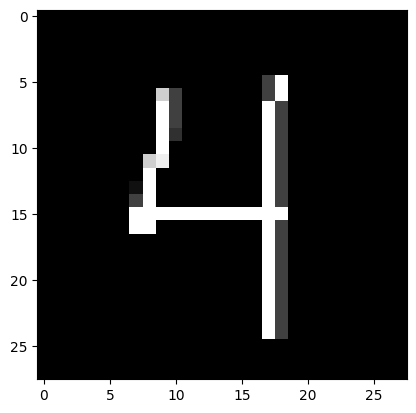

In [25]:
data = rec_digit('4.png')
prepared_data = torch.tensor(data, device = device,dtype=torch.float32)
plt.imshow(prepared_data.cpu().reshape((28,28)),cmap="gray")
with torch.inference_mode():
  res = model(prepared_data)
result = int(res.argmax())
print(f"Это цифра: {result}")
print(res)